In [1]:
import pandas as pd
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
project_path = '/kaggle/input/new-york-city-taxi-fare-prediction/'
train = pd.read_csv(project_path + 'train.csv',nrows=5000000)
test = pd.read_csv(project_path + 'test.csv')
test_ids = test['key']
train.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 305.2+ MB


In [4]:
train.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.000000e+06,5.000000e+06,5.000000e+06,4.999964e+06,4.999964e+06,5.000000e+06
mean,1.134080e+01,-7.250678e+01,3.991974e+01,-7.250652e+01,3.991725e+01,1.684695e+00
std,9.820175e+00,1.280970e+01,8.963509e+00,1.284777e+01,9.486767e+00,1.331854e+00
min,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399206e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076711e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.310364e+03,3.457622e+03,3.345917e+03,2.080000e+02


Text(0, 0.5, 'Frequency')

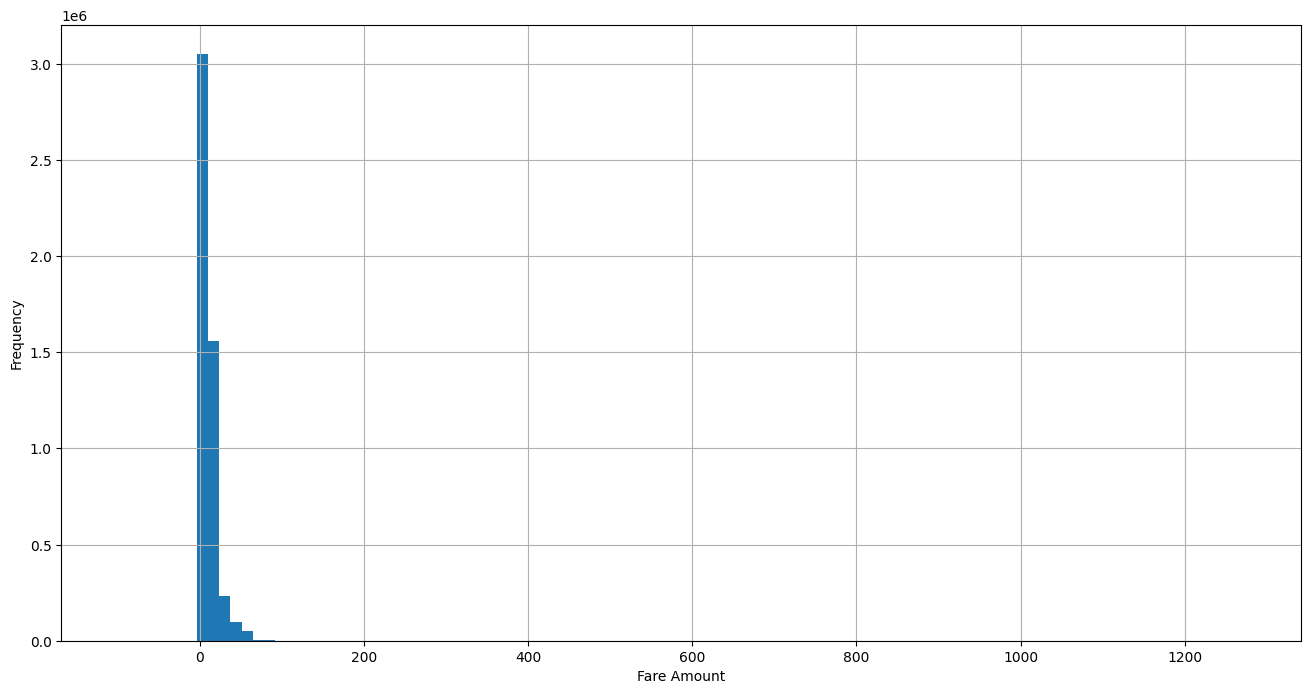

In [5]:
train.fare_amount.hist(bins=100,figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")


In [6]:
train[train.fare_amount 100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3750197776.py, line 1)

Text(0, 0.5, 'Frequency')

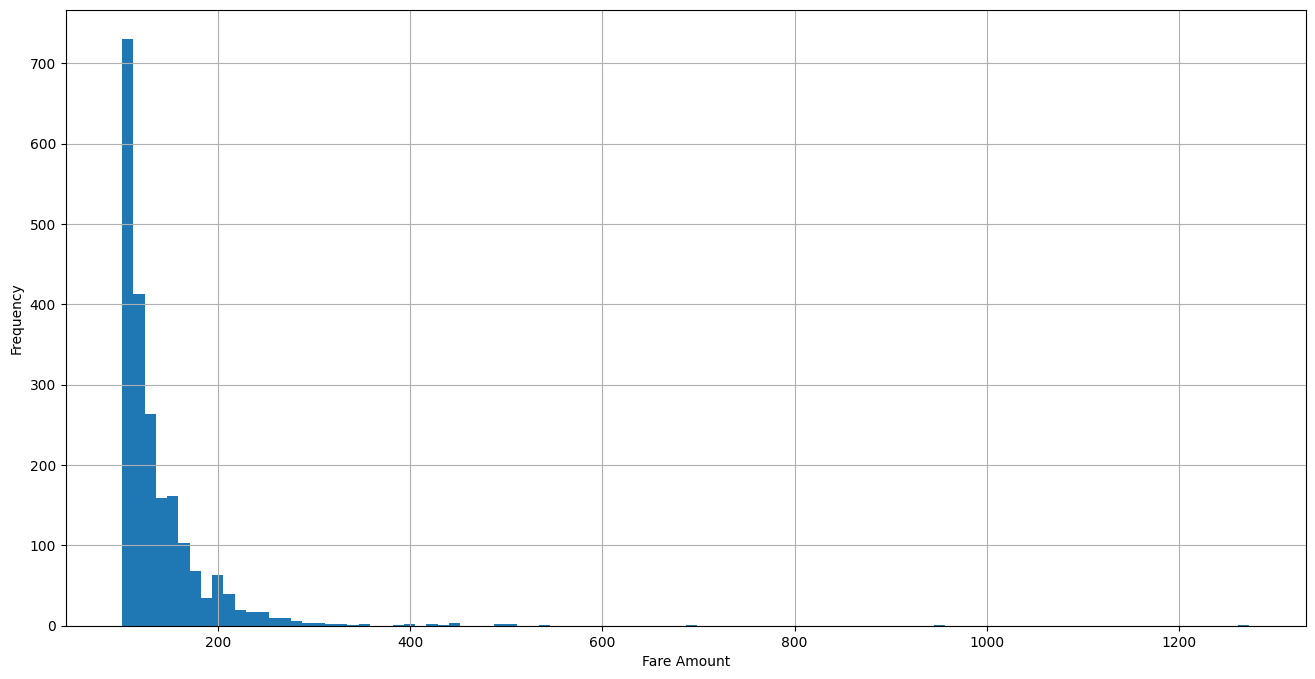

In [7]:
train[train.fare_amount >=100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")


In [8]:
train[train.fare_amount 100].shape


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2775951671.py, line 1)

In [9]:
train[train.fare_amount >=100].shape


(2145, 8)

Text(0, 0.5, 'Frequency')

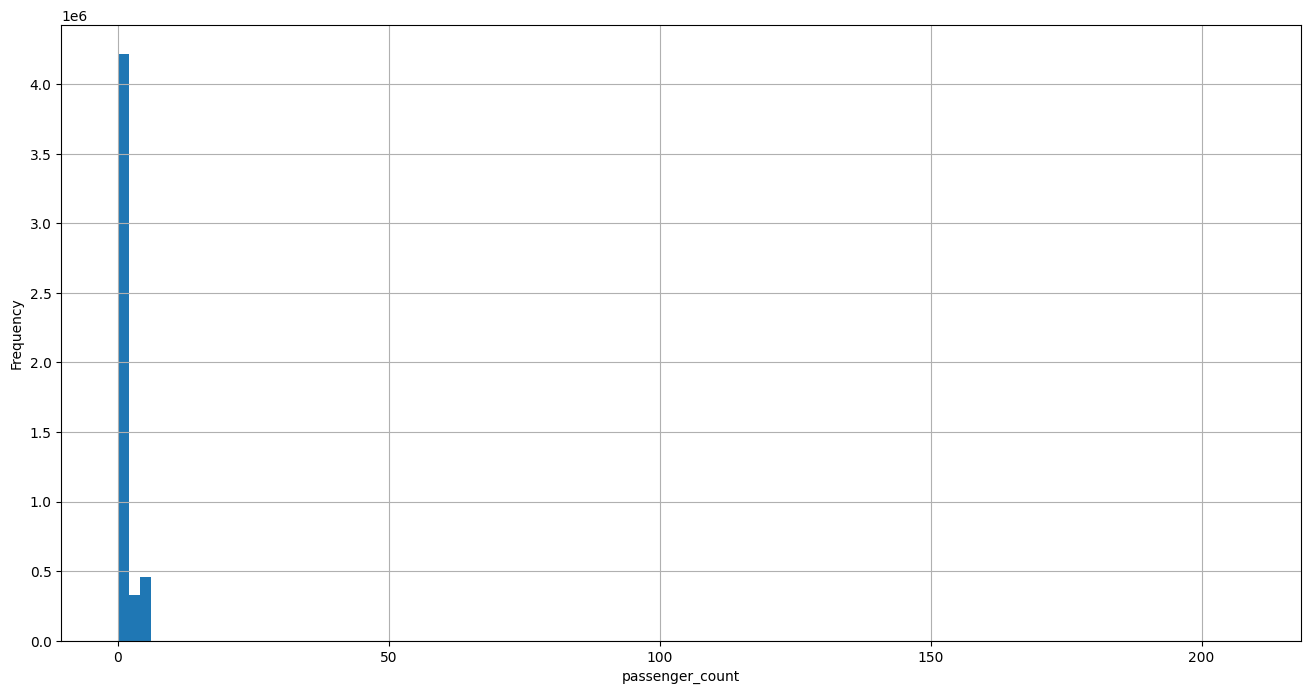

In [10]:
train.passenger_count.hist(bins=100,figsize = (16,8))
plt.xlabel("passenger_count")
plt.ylabel("Frequency")


In [11]:
train[train.passenger_count10].passenger_count.hist(bins=10,figsize = (16,8))
plt.xlabel("passenger_count")
plt.ylabel("Frequency")


AttributeError: 'DataFrame' object has no attribute 'passenger_count10'

In [12]:
train[train.passenger_count7].passenger_count.hist(bins=10,figsize = (16,8))
plt.xlabel("passenger_count")
plt.ylabel("Frequency")


AttributeError: 'DataFrame' object has no attribute 'passenger_count7'

Text(0, 0.5, 'Frequency')

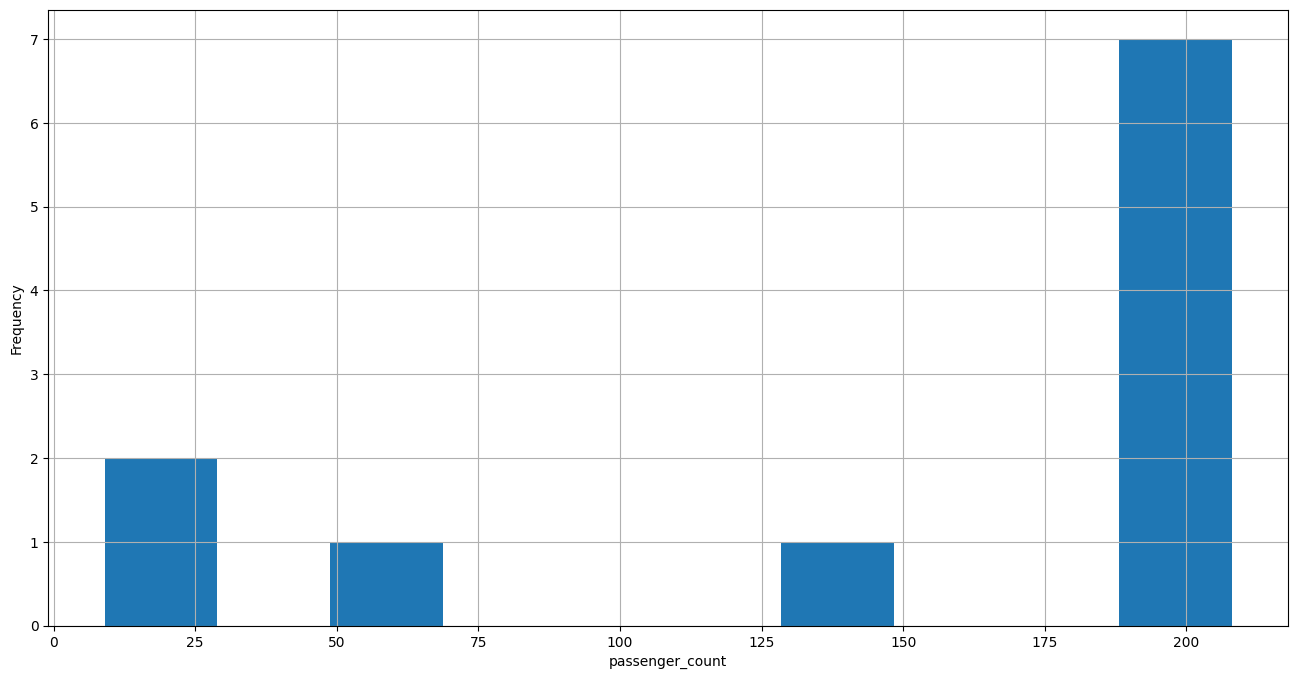

In [13]:
train[train.passenger_count>7].passenger_count.hist(bins=10,figsize = (16,8))
plt.xlabel("passenger_count")
plt.ylabel("Frequency")


In [14]:
train[train.passenger_count >7]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.30,2009-07-30 11:54:00 UTC,0.000000,0.000000,0.000000,0.000000,208
1007609,2014-06-24 15:13:00.00000040,104.00,2014-06-24 15:13:00 UTC,-74.015780,40.715420,-74.170280,40.708340,9
2154045,2010-12-16 11:21:00.000000209,3.30,2010-12-16 11:21:00 UTC,0.000000,0.000000,0.000000,0.000000,208
2198549,2010-12-15 14:20:00.00000010,3.30,2010-12-15 14:20:00 UTC,0.000000,0.000000,0.000000,0.000000,208
2910347,2010-12-16 06:44:00.00000039,4.50,2010-12-16 06:44:00 UTC,0.000000,0.000000,0.000000,0.000000,208
3107489,2009-05-12 14:50:00.000000175,2.70,2009-05-12 14:50:00 UTC,-73.937818,40.758260,-73.937827,40.758250,208
3323791,2011-08-27 01:24:00.000000168,8.50,2011-08-27 01:24:00 UTC,-73.987858,40.760340,-74.000682,40.752413,129
4095440,2015-06-14 08:56:16.0000001,37.04,2015-06-14 08:56:16 UTC,-73.982094,40.756252,-73.872482,40.774506,9
4103745,2010-12-22 12:11:00.000000230,23.70,2010-12-22 12:11:00 UTC,0.000000,0.000000,0.000000,0.000000,208
4432483,2009-05-11 13:56:00.00000088,11.10,2009-05-11 13:56:00 UTC,-73.937733,40.758267,-73.937737,40.758273,208


In [15]:
train[train.passenger_count ==0].shape


(17639, 8)

In [16]:
plt.figure(figsize= (16,8))
sns.boxplot(x = train[train.passenger_count 7].passenger_count, y = train.fare_amount)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3107660253.py, line 2)

In [17]:
train[train.passenger_count 7][['fare_amount','passenger_count']].corr()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1417694546.py, line 1)

In [18]:
train.isnull().sum() # find null value


key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    36
dropoff_latitude     36
passenger_count       0
dtype: int64

In [19]:
train = train.dropna(how='any', axis=0) # delete them


In [20]:
test.head()
test.isnull().sum()


key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [21]:
train = train[train.fare_amount>=0]


In [22]:
def deal_time_features(df):
    df['pickup_datetime'] = df['pickup_datetime'].str.slice(0, 16)
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M')
    df['hour'] = df.pickup_datetime.dt.hour
    df['month'] = df.pickup_datetime.dt.month
    df["year"] = df.pickup_datetime.dt.year
    df["weekday"] = df.pickup_datetime.dt.weekday
    return df
train = deal_time_features(train)
test = deal_time_features(test)

train.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,month,year,weekday
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:00+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,6,2009,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:00+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,1,2010,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,8,2011,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:00+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,4,2012,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,3,2010,1


In [23]:
def distance(x1, y1, x2, y2):
    p = 0.017453292519943295 
    a = 0.5 - np.cos((x2 - x1) * p)/2 + np.cos(x1 * p) * np.cos(x2 * p) * (1 - np.cos((y2 - y1) * p)) / 2
    dis = 0.6213712 * 12742 * np.arcsin(np.sqrt(a))
    return dis  
train['distance_miles'] = distance(train.pickup_latitude,train.pickup_longitude,train.dropoff_latitude,train.dropoff_longitude)
test['distance_miles'] = distance(test.pickup_latitude, test.pickup_longitude,test.dropoff_latitude,test.dropoff_longitude)
train.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,month,year,weekday,distance_miles
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:00+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,6,2009,0,0.640487
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:00+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,1,2010,1,5.250670
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,8,2011,3,0.863411
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:00+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,4,2012,5,1.739386
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,3,2010,1,1.242218


In [24]:
train[(train['distance_miles']==0)&(train['fare_amount']==0)] # Print data with price and distance of 0
train = train.drop(index= train[(train['distance_miles']==0)&(train['fare_amount']==0)].index, axis=0) # delete them


In [25]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
fare_amount,4999731.0,11.341637,9.818994,0.000000,6.000000,8.500000,12.500000,1273.310000
pickup_longitude,4999731.0,-72.507099,12.808932,-3426.608950,-73.992062,-73.981812,-73.967110,3439.425565
pickup_latitude,4999731.0,39.919920,8.963268,-3488.079513,40.734909,40.752635,40.767115,3310.364462
dropoff_longitude,4999731.0,-72.506866,12.846920,-3412.653087,-73.991393,-73.980158,-73.963673,3457.622350
dropoff_latitude,4999731.0,39.917444,9.486516,-3488.079513,40.734043,40.753150,40.768110,3345.917353
passenger_count,4999731.0,1.684703,1.331850,0.000000,1.000000,1.000000,2.000000,208.000000
hour,4999731.0,13.510651,6.516338,0.000000,9.000000,14.000000,19.000000,23.000000
month,4999731.0,6.267070,3.435214,1.000000,3.000000,6.000000,9.000000,12.000000
year,4999731.0,2011.738905,1.860185,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
weekday,4999731.0,3.041889,1.949259,0.000000,1.000000,3.000000,5.000000,6.000000


In [26]:
train.drop(columns=['key', 'pickup_datetime'], axis=1).corr()['fare_amount']


fare_amount          1.000000
pickup_longitude     0.008623
pickup_latitude     -0.006770
dropoff_longitude    0.009327
dropoff_latitude    -0.006735
passenger_count      0.012900
hour                -0.017307
month                0.024239
year                 0.115825
weekday              0.003019
distance_miles       0.026288
Name: fare_amount, dtype: float64

In [27]:
df_train = train.drop(columns=['key', 'pickup_datetime'], axis=1).copy()
df_test = test.drop(columns=['key', 'pickup_datetime'], axis=1).copy()

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('fare_amount',axis=1)
                                                    ,df_train['fare_amount']
                                                    ,test_size=0.2
                                                    ,random_state = 42)

import xgboost as xgb
params = { 
    'max_depth': 7,
    'gamma' :0,
    'eta':0.3, 
    'subsample': 1,
    'colsample_bytree': 0.9, 
    'objective':'reg:squarederror',
    'eval_metric':'rmse',
}
def XGBmodel(X_train,X_test,y_train,y_test,params):
    matrix_train = xgb.DMatrix(X_train,label=y_train)
    matrix_test = xgb.DMatrix(X_test,label=y_test)
    model=xgb.train(params=params,
                    dtrain=matrix_train,
                    num_boost_round=5000, 
                    early_stopping_rounds=10,
                    evals=[(matrix_test,'test')])
    return model

model = XGBmodel(X_train,X_test,y_train,y_test,params)


[0]	test-rmse:7.75276
[1]	test-rmse:6.45358
[2]	test-rmse:5.68775
[3]	test-rmse:5.22683
[4]	test-rmse:4.96886
[5]	test-rmse:4.81962
[6]	test-rmse:4.73293
[7]	test-rmse:4.67891
[8]	test-rmse:4.63888
[9]	test-rmse:4.61377
[10]	test-rmse:4.59516
[11]	test-rmse:4.57221
[12]	test-rmse:4.56352
[13]	test-rmse:4.54656
[14]	test-rmse:4.53671
[15]	test-rmse:4.53272
[16]	test-rmse:4.52420
[17]	test-rmse:4.51743
[18]	test-rmse:4.51472
[19]	test-rmse:4.49713
[20]	test-rmse:4.49390
[21]	test-rmse:4.49002
[22]	test-rmse:4.48503
[23]	test-rmse:4.47308
[24]	test-rmse:4.46780
[25]	test-rmse:4.46366
[26]	test-rmse:4.45950
[27]	test-rmse:4.45747
[28]	test-rmse:4.45384
[29]	test-rmse:4.45102
[30]	test-rmse:4.44860
[31]	test-rmse:4.44743
[32]	test-rmse:4.44065
[33]	test-rmse:4.43474
[34]	test-rmse:4.43075
[35]	test-rmse:4.42907
[36]	test-rmse:4.42391
[37]	test-rmse:4.41862
[38]	test-rmse:4.41505
[39]	test-rmse:4.41326
[40]	test-rmse:4.41143
[41]	test-rmse:4.41091
[42]	test-rmse:4.40798
[43]	test-rmse:4.4069

In [28]:
prediction = model.predict(xgb.DMatrix(df_test))
prediction


array([ 7.029632 , 31.765574 ,  4.0986276, ...,  7.127488 ,  9.25194  ,
        5.882062 ], dtype=float32)

In [29]:
res = pd.DataFrame()
res['key'] = test['key']
res['fare_amount'] = prediction
res.to_csv('/kaggle/working/results.csv', index=False)
